<a href="https://colab.research.google.com/github/OmarMachuca851/Task/blob/main/binary_clasification_Iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clasificación Binaria de Iris

## Problema 1: Seleccionar caracteristicas y categorías para la práctica

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

iris_data = load_iris()

X = pd.DataFrame(iris_data.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(iris_data.target, columns=['Species'])

df = pd.concat([X, y], axis=1)
df

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [2]:
# Extrac sepal_length and petal_length with target that is greater than 0
df = df[['sepal_length', 'petal_length', 'Species']][df['Species'] != 0]
df

,sepal_length,petal_length,Species
50,7.0,4.7,1
51,6.4,4.5,1
52,6.9,4.9,1
53,5.5,4.0,1
54,6.5,4.6,1
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## Problema 2: Analisis de datos

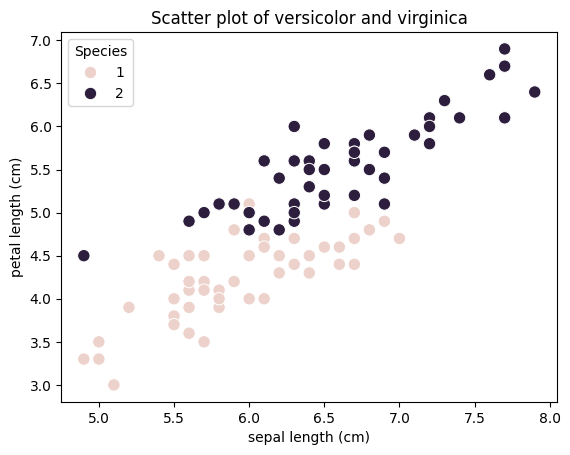

In [3]:
# create the scatter plot
sns.scatterplot(x='sepal_length', y='petal_length', hue='Species', data=df, s=80)
plt.title('Scatter plot of versicolor and virginica')
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

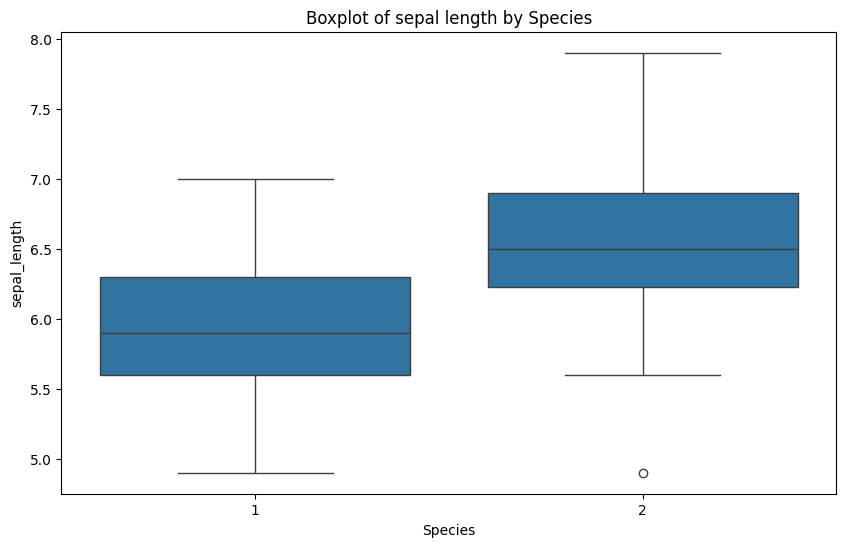

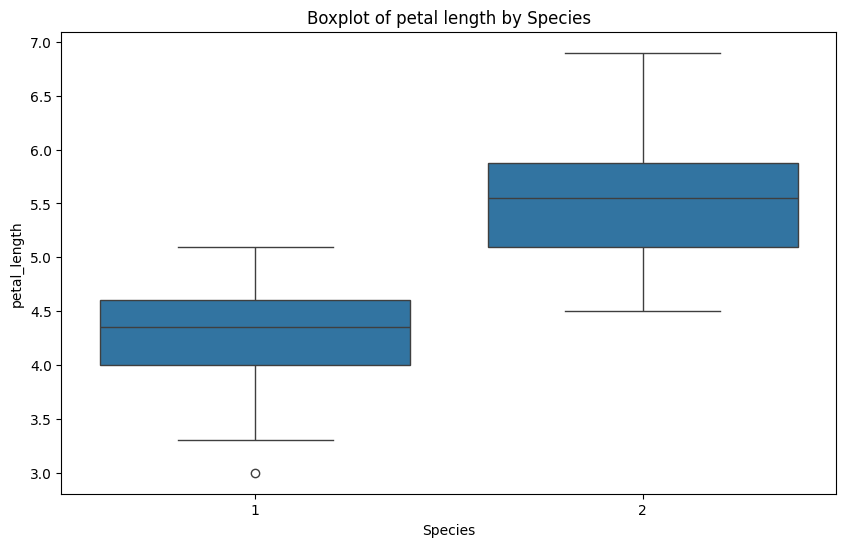

In [4]:
# Box plot
# Box plot for sepal length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='sepal_length', data=df)
plt.title('Boxplot of sepal length by Species')
plt.show()

# Box plot for petal length
plt.figure(figsize=(10, 6))
sns.boxplot(x='Species', y='petal_length', data=df)
plt.title('Boxplot of petal length by Species')
plt.show()

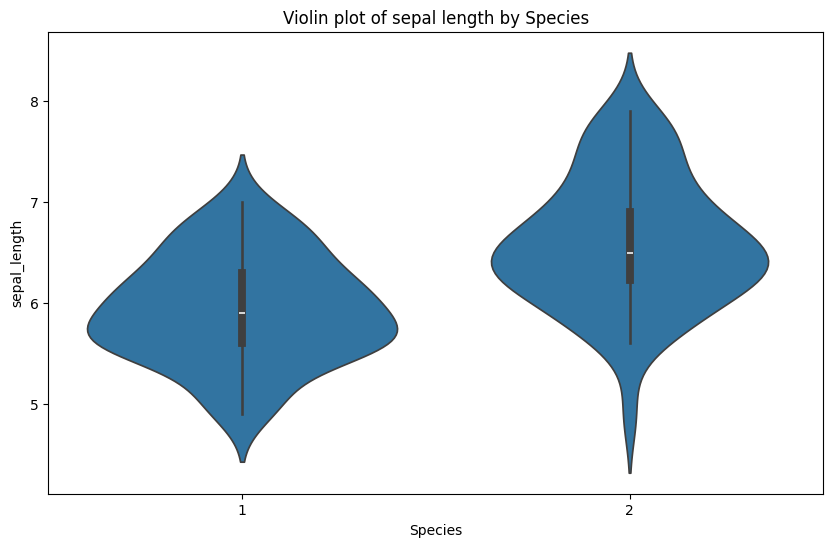

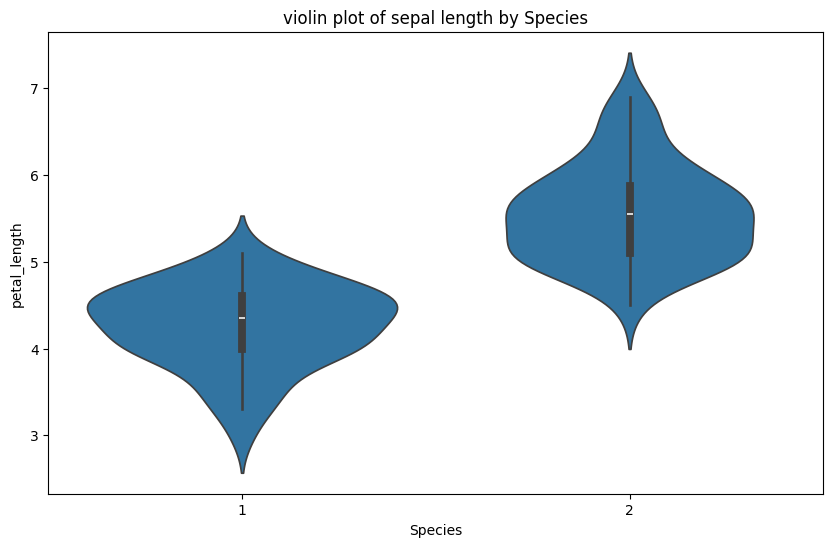

In [5]:
# Violin plots
# violin plot for sepal legth
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='sepal_length', data=df)
plt.title('Violin plot of sepal length by Species')
plt.show()

# violin plot for petal length
plt.figure(figsize=(10, 6))
sns.violinplot(x='Species', y='petal_length', data=df)
plt.title('violin plot of sepal length by Species')
plt.show()

## Problema 3: División de datos de preprocesammiento/entrenamiento y datos de verificación

In [6]:
from sklearn.model_selection import train_test_split

subset = df.loc[(df['Species'] == 1) | (df['Species'] == 2)].reset_index(drop=True)

X = np.array(subset.loc[:, ['sepal_length', 'petal_length']])
y  = np.array(subset['Species'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(75, 2) (25, 2) (75,) (25,)


## Problema 4: Preentrenamiento/Standarization

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_trans = scaler.transform(X_train)
X_test_trans = scaler.transform(X_test)

X_train_trans
X_test_trans

array([[ 0.02958286,  0.17465819],
       [ 0.02958286,  0.77008384],
       [ 0.91706879,  0.88916897],
       [-0.85790306, -0.89710798],
       [-1.00581738, -0.89710798],
       [-1.15373171, -1.13527824],
       [ 0.02958286, -0.06351207],
       [ 1.6566404 ,  1.36550949],
       [-1.89330331, -1.73070389],
       [ 1.06498311, -0.30168233],
       [-0.11833146, -0.53985259],
       [-1.15373171, -1.3734485 ],
       [ 0.02958286, -0.06351207],
       [-0.4141601 ,  0.17465819],
       [ 0.62124015,  0.77008384],
       [ 0.32541151, -0.42076746],
       [-0.11833146, -0.1825972 ],
       [-0.26624578, -0.06351207],
       [-0.4141601 , -1.13527824],
       [-1.15373171, -1.49253363],
       [ 1.95246904,  1.96093514],
       [-0.4141601 , -0.1825972 ],
       [ 0.76915447, -0.1825972 ],
       [-0.70998874, -1.13527824],
       [-0.4141601 ,  0.05557306]])

## Problema 5: Aprendizaje y estimación

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# for the case of 5nn
neigh5 = KNeighborsClassifier(n_neighbors=5)
neigh5.fit(X_train_trans, y_train)
predict_5 = neigh5.predict(X_test_trans)

results_5 = pd.DataFrame([predict_5, y_test], index=['prediction', 'actual value'])
results_5

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
prediction,2,2,2,1,1,1,1,2,1,1,...,1,1,1,1,1,2,1,1,1,2
actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [9]:
# for the case of 3nn
neigh3 = KNeighborsClassifier(n_neighbors=3)
neigh3.fit(X_train_trans, y_train)
predict_3 = neigh3.predict(X_test_trans)

results_3 = pd.DataFrame([predict_3, y_test], index=['prediction', 'actual value'])
results_3

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [10]:
# for the case of 1nn
neigh1 = KNeighborsClassifier(n_neighbors=1)
neigh1.fit(X_train_trans, y_train)
predict_1 = neigh1.predict(X_test_trans)

results_1 = pd.DataFrame([predict_1, y_test], index=['prediction', 'actual value'])
results_1

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
prediction,2,2,2,1,1,1,2,2,1,1,...,1,1,1,1,1,2,1,1,1,2
actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


## Problema 6: Evaluación

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

print('Accuracy classification score for predict_5, predict_3, predict_1:\n')

acc_score5 = accuracy_score(y_test, predict_5)
acc_score3 = accuracy_score(y_test, predict_3)
acc_score1 = accuracy_score(y_test, predict_1)

print(f'for nn5: {acc_score5}')
print(f'for nn3: {acc_score3}')
print(f'for nn1: {acc_score1}')

print('-------------------------------------------------------------------------\n')

print('precision_score for predic_5, predict_3, predict_1:\n')

prec_score5 = precision_score(y_test, predict_5)
prec_score3 = precision_score(y_test, predict_3)
prec_score1 = precision_score(y_test, predict_1)

print(f'for nn5: {prec_score5}')
print(f'for nn3: {prec_score3}')
print(f'for nn1: {prec_score1}')

print('-------------------------------------------------------------------------\n')

print('recall_score for predic_5, predict_3, predict_1:\n')

recall_score5 = recall_score(y_test, predict_5)
recall_score3 = recall_score(y_test, predict_3)
recall_score1 = recall_score(y_test, predict_1)

print(f'for nn5: {recall_score5}')
print(f'for nn3: {recall_score3}')
print(f'for nn1: {recall_score1}')

print('-------------------------------------------------------------------------\n')

print('f1_score for predic_5, predict_3, predict_1:\n')

f1_score5 = f1_score(y_test, predict_5)
f1_score3 = f1_score(y_test, predict_3)
f1_score1 = f1_score(y_test, predict_1)

print(f'for nn5: {f1_score5}')
print(f'for nn3: {f1_score3}')
print(f'for nn1: {f1_score1}')

print('-------------------------------------------------------------------------\n')

print('confusion matrix to evaluate  the accuracy of classification score for predic_5, predict_3, predict_1:\n')

confusion_matrix5 = confusion_matrix(y_test, predict_5)
confusion_matrix3 = confusion_matrix(y_test, predict_3)
confusion_matrix1 = confusion_matrix(y_test, predict_1)

print(f'for nn5: {confusion_matrix5}')
print(f'for nn3: {confusion_matrix3}')
print(f'for nn1: {confusion_matrix1}')

Accuracy classification score for predict_5, predict_3, predict_1:

for nn5: 0.8
for nn3: 0.8
for nn1: 0.8
-------------------------------------------------------------------------

precision_score for predic_5, predict_3, predict_1:

for nn5: 0.7647058823529411
for nn3: 0.8
for nn1: 0.8
-------------------------------------------------------------------------

recall_score for predic_5, predict_3, predict_1:

for nn5: 0.9285714285714286
for nn3: 0.8571428571428571
for nn1: 0.8571428571428571
-------------------------------------------------------------------------

f1_score for predic_5, predict_3, predict_1:

for nn5: 0.8387096774193549
for nn3: 0.8275862068965517
for nn1: 0.8275862068965517
-------------------------------------------------------------------------

confusion matrix to evaluate  the accuracy of classification score for predic_5, predict_3, predict_1:

for nn5: [[13  1]
 [ 4  7]]
for nn3: [[12  2]
 [ 3  8]]
for nn1: [[12  2]
 [ 3  8]]


### El significado de los cuatro tipos de valores de índice:

- **Accuracy_score:** ésta puntuación representa cuántos valores de predicción es exactamente el mismo que el valor real. Por ejemplo obtuvimos 21/25 valores correcto de la tabla anterior, lo que equivale a 0.84 de toda las muestras de prueba.

- **Precision_score:** la relacion de precisiolis TP/(TP + FP) donde TP es el número de positivos verdaderos y FP es el número de Falsos positivos. La precisión es intuitivamente la capacidad del clasificador para no etiquetar una muestra negativa como positiva.
El mejor valor es 1 y el peor valor es 0.

- **Recall_score:** es la relación TP/(TP + FN) donde TP es el número de positivos verdaderos y FN el número de falsos negativos. Es intuitivamente la capacidad para encontrar todas las muestras positivas.
El mejor valor es 1 y el peor valor es 0.

- **F1_score:** puede interpretarse como una media armónica de precisión_score y recall_score, donde el mejor puntaje es 1 y el peor es 0. La fórmula para f1_score es:

`F1 = 2 * (precision * recall)/(precision + racall)`

## Problema 7: Visualización

In [12]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    scatter_color = ['red', 'blue']
    contourf_color = ['pink', 'skyblue']
    n_class = 2

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color=scatter_color[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

Decision boundary for 1 neighbors:



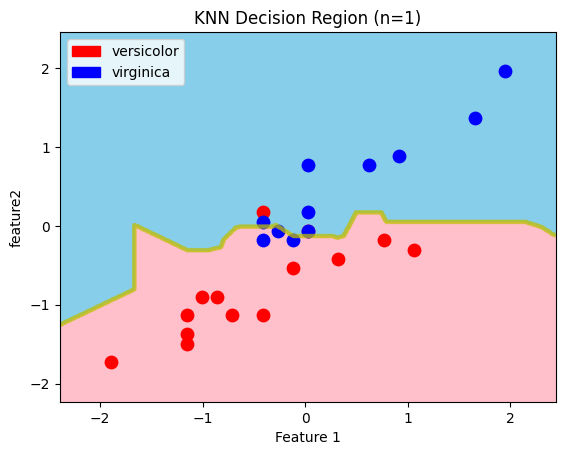

In [13]:
print('Decision boundary for 1 neighbors:\n')
decision_region(X_test_trans, y_test, neigh1, title='KNN Decision Region (n=1)', xlabel='Feature 1', ylabel='feature2')

Decision boundary for 3 neighbors:



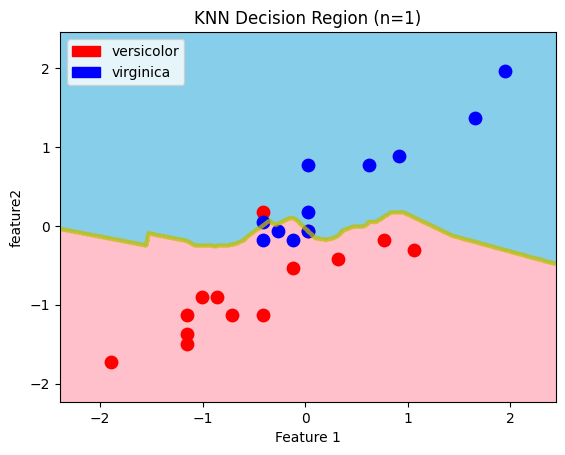

In [14]:
print('Decision boundary for 3 neighbors:\n')
decision_region(X_test_trans, y_test, neigh3, title='KNN Decision Region (n=1)', xlabel='Feature 1', ylabel='feature2')

Decision boundary for 5 neighbors:



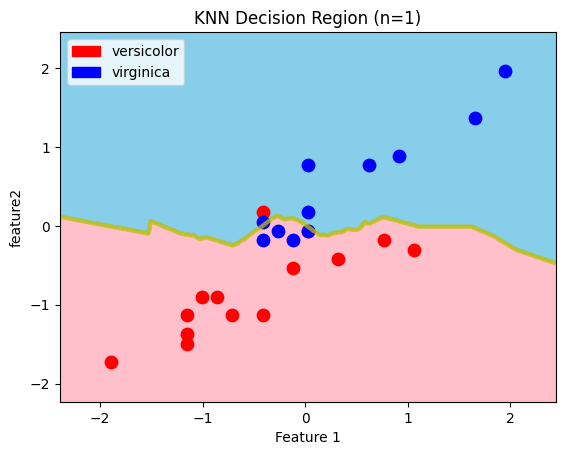

In [15]:
print('Decision boundary for 5 neighbors:\n')
decision_region(X_test_trans, y_test, neigh5, title='KNN Decision Region (n=1)', xlabel='Feature 1', ylabel='feature2')

## Problema 8: Aprendizaje por otros métodos

In [16]:
from sklearn.metrics import *

def evaluation(test, predict):
    acc_score = accuracy_score(test, predict)
    prec_score = precision_score(test, predict)
    rec_score = recall_score(test, predict)
    f_score = f1_score(test, predict)
    conf_matrix = confusion_matrix(test, predict)
    print(f'Accuracy {acc_score:.3f}')
    print(f'precision {prec_score:.3f}')
    print(f'Recall {rec_score:.3f}')
    print(f'F1 {f1_score1:.3f}')
    print(f'Confusion matrix:\n  {conf_matrix} ')

### - Utilizando logistic regresssion

In [17]:
from sklearn.linear_model import *
logregression = LogisticRegression()
logregression.fit(X_train_trans, y_train)
log_predict = logregression.predict(X_test_trans)
result_log = pd.DataFrame([log_predict, y_test], index=['Predict', 'Actual value'])
result_log

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [18]:
evaluation(y_test, log_predict)

Accuracy 0.840
precision 0.857
Recall 0.857
F1 0.828
Confusion matrix:
  [[12  2]
 [ 2  9]] 


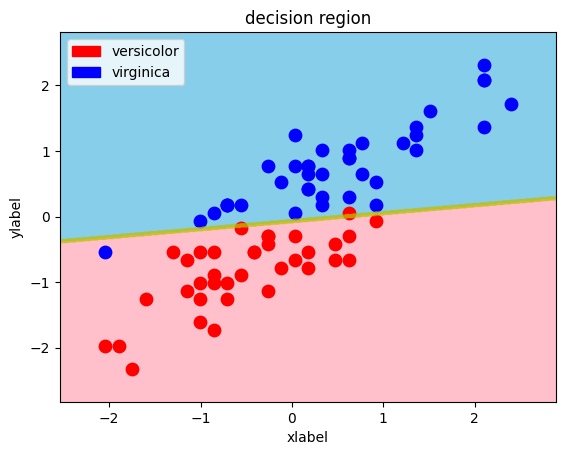

In [19]:
decision_region(X_train_trans, y_train, logregression)

### - SVM

In [20]:
from sklearn.svm import *
from sklearn.pipeline import make_pipeline

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_trans, y_train)
svm_predict = svm.predict(X_test_trans)
result_svm = pd.DataFrame([svm_predict, y_test], index=['Predict', 'Actual value'])
result_svm

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,2,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [21]:
evaluation(y_test, svm_predict)

Accuracy 0.840
precision 0.857
Recall 0.857
F1 0.828
Confusion matrix:
  [[12  2]
 [ 2  9]] 


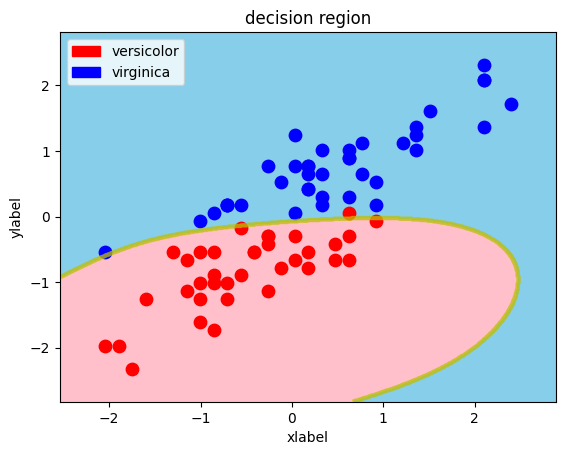

In [22]:
decision_region(X_train_trans, y_train, svm)

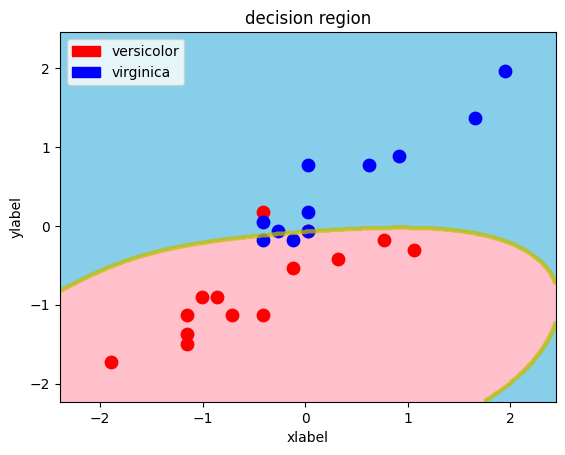

In [23]:
decision_region(X_test_trans, y_test, svm)

### - Decision tree

In [24]:
from sklearn.tree import *

decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_train_trans, y_train)
detree_predict = decisiontree.predict(X_test_trans)
result_tree = pd.DataFrame([detree_predict, y_test], index=['Predict', 'Actual value'])
result_tree

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [25]:
evaluation(y_test, detree_predict)

Accuracy 0.840
precision 0.812
Recall 0.929
F1 0.828
Confusion matrix:
  [[13  1]
 [ 3  8]] 


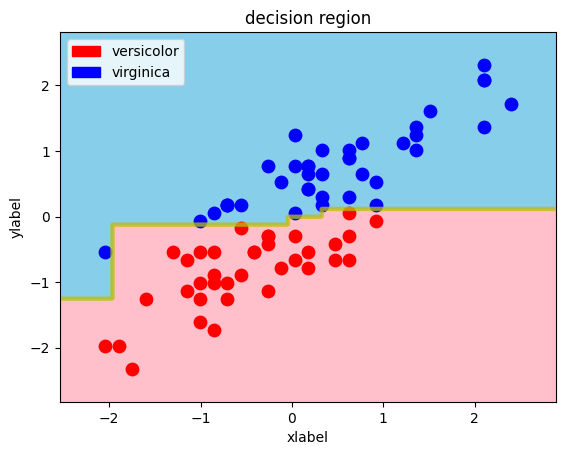

In [26]:
decision_region(X_train_trans, y_train, decisiontree)

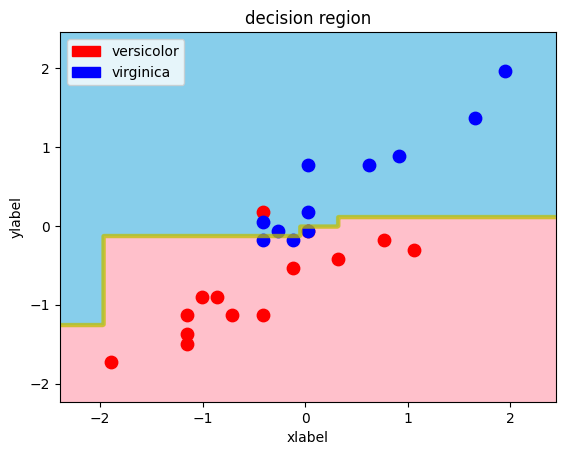

In [27]:
decision_region(X_test_trans, y_test, decisiontree)

### - Random forest

In [28]:
from sklearn.ensemble import *

randomforest = RandomForestClassifier()
randomforest.fit(X_train_trans, y_train)
rafo_predict = randomforest.predict(X_test_trans)
result_rafo = pd.DataFrame([rafo_predict, y_test], index=['Predict', 'Actual value'])
result_rafo

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
Predict,2,2,2,1,1,1,1,2,1,1,...,1,1,2,1,1,2,1,1,1,2
Actual value,2,2,2,1,1,1,1,2,1,1,...,1,2,2,1,1,2,2,1,1,2


In [29]:
evaluation(y_test, rafo_predict)

Accuracy 0.840
precision 0.812
Recall 0.929
F1 0.828
Confusion matrix:
  [[13  1]
 [ 3  8]] 


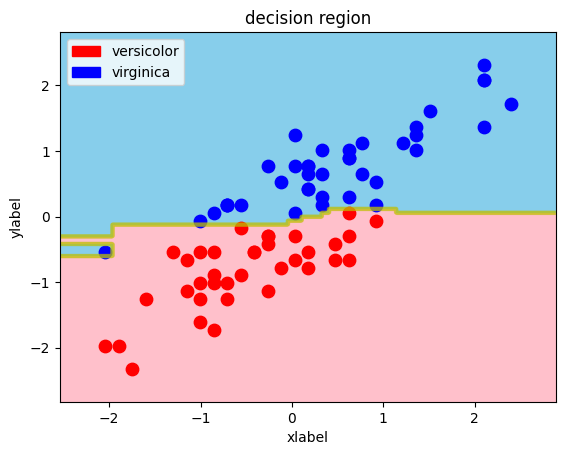

In [30]:
decision_region(X_train_trans, y_train, randomforest)

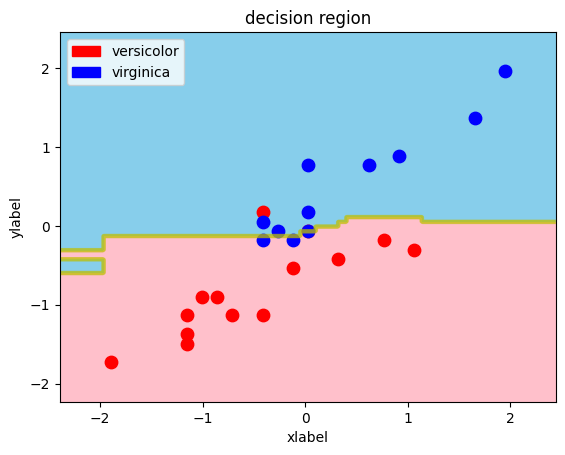

In [31]:
decision_region(X_test_trans, y_test, randomforest)

## Problema 9 (avanzado): comparación con y sin estandarización

In [32]:
k_neigh_3 = KNeighborsClassifier(n_neighbors=3)
k_neigh_3.fit(X_train, y_train.ravel())
pred3 = k_neigh_3.predict(X_test)

evaluation(y_test, pred3)

Accuracy 0.800
precision 0.800
Recall 0.857
F1 0.828
Confusion matrix:
  [[12  2]
 [ 3  8]] 


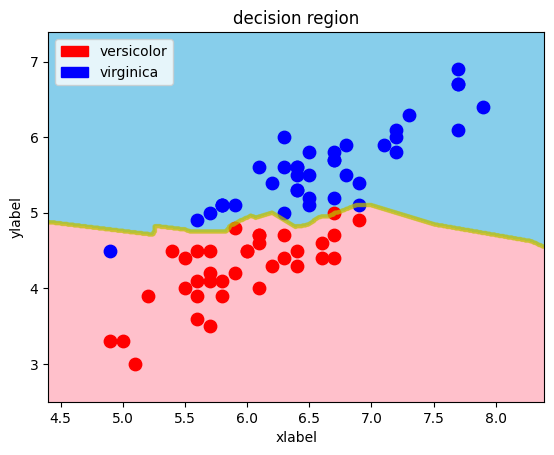

In [33]:
decision_region(X_train, y_train, k_neigh_3)

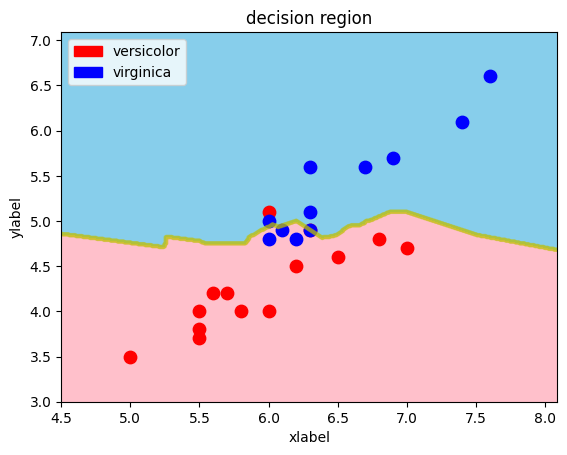

In [34]:
decision_region(X_test, y_test, k_neigh_3)

In [35]:
logregression_unscaled = LogisticRegression()
logregression_unscaled.fit(X_train, y_train)
log_predict_unscaled = logregression_unscaled.predict(X_test)

evaluation(y_test, log_predict_unscaled)

Accuracy 0.840
precision 0.857
Recall 0.857
F1 0.828
Confusion matrix:
  [[12  2]
 [ 2  9]] 


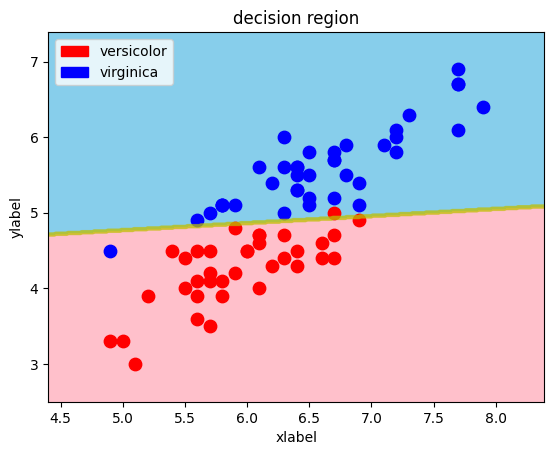

In [36]:
decision_region(X_train, y_train, logregression_unscaled)

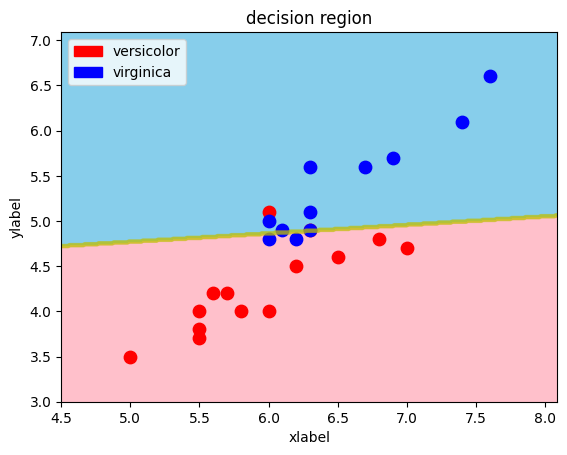

In [37]:
decision_region(X_test, y_test, logregression_unscaled)

In [38]:
svm_unscaled = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm_unscaled.fit(X_train, y_train)
svm_predict_unscaled = svm_unscaled.predict(X_test)

evaluation(y_test, svm_predict_unscaled)

Accuracy 0.840
precision 0.857
Recall 0.857
F1 0.828
Confusion matrix:
  [[12  2]
 [ 2  9]] 


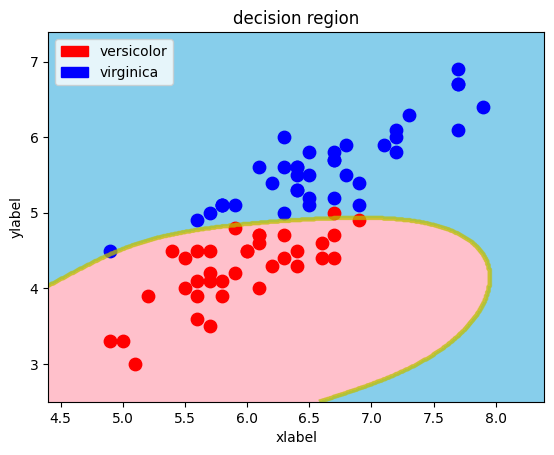

In [39]:
decision_region(X_train, y_train, svm_unscaled)

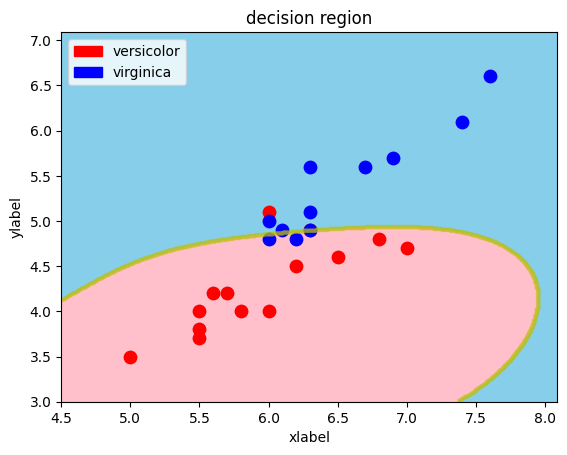

In [40]:
decision_region(X_test, y_test, svm_unscaled)

In [41]:
decisiontree_unscaled = DecisionTreeClassifier()
decisiontree_unscaled.fit(X_train, y_train)
dtree_predict_unsacled = decisiontree_unscaled.predict(X_test)

evaluation(y_test, dtree_predict_unsacled)

Accuracy 0.840
precision 0.812
Recall 0.929
F1 0.828
Confusion matrix:
  [[13  1]
 [ 3  8]] 


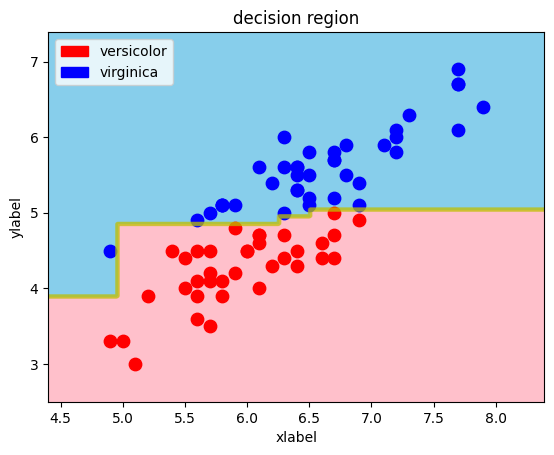

In [42]:
decision_region(X_train, y_train, decisiontree_unscaled)

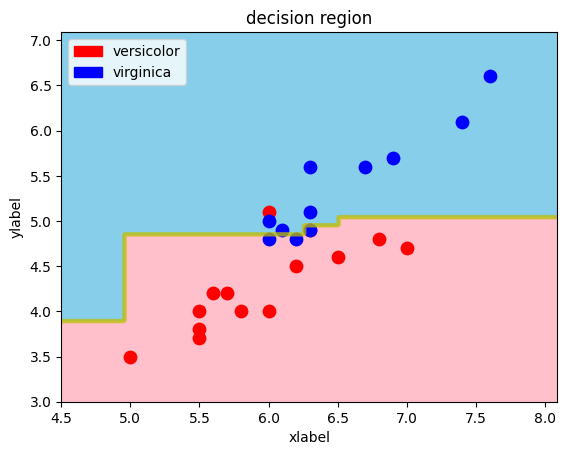

In [43]:
decision_region(X_test, y_test, decisiontree_unscaled)

In [44]:
randomforest_unscaled = RandomForestClassifier()
randomforest_unscaled.fit(X_train, y_train)
rafo_predict_unscaled = randomforest_unscaled.predict(X_test)

evaluation(y_test, rafo_predict_unscaled)

Accuracy 0.800
precision 0.765
Recall 0.929
F1 0.828
Confusion matrix:
  [[13  1]
 [ 4  7]] 


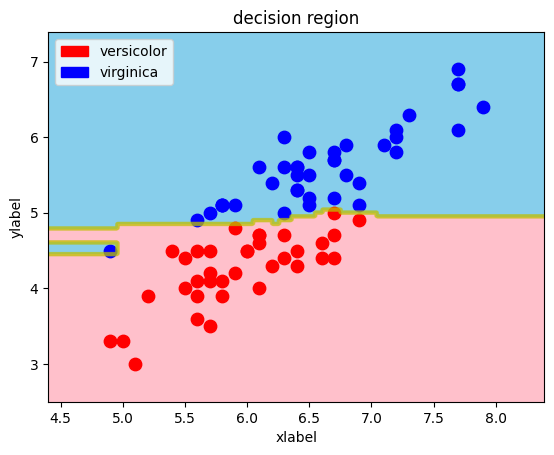

In [45]:
decision_region(X_train, y_train, randomforest_unscaled)

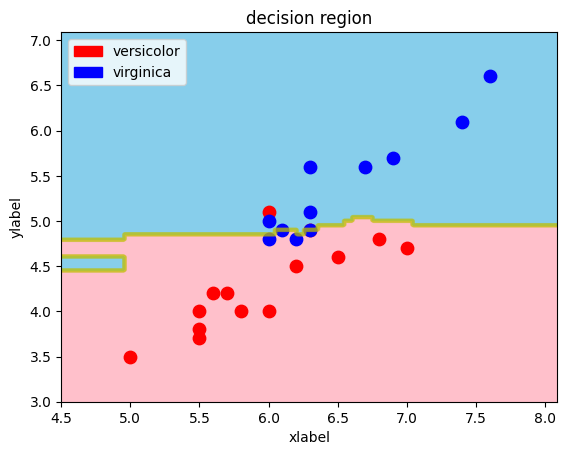

In [46]:
decision_region(X_test, y_test, randomforest_unscaled)

### ¿Qué es la estandarizació en machine learning?

- La estandarizació es una técnica importante que se realiza principalmente como un paso de preprocesamiento antes de muchos modelos de machine learning, para estandarizar el rango de las características de un conjunto de datos de entrada.

- La estandarización es una técnica de escala dónde los valores se centran en la media con una desviación estándar de la unidad, Esto significa que la media del atributo se convierte en cero y la distribución resultante tiene la unida esándar de desviación.

## Problema 10 (avanzado): Metodo preciso utilizando todas las variables objetivas

In [47]:
X = pd.DataFrame(data=load_iris().data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y = pd.DataFrame(load_iris().target, columns=[('Species')])
df = pd.concat([X, y], axis=1)
df = df[['sepal_length', 'petal_length', 'Species']]
df

,sepal_length,petal_length,Species
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


In [48]:
# Convert DataFrame to ndarray
X = df.loc[:, 'sepal_length':'petal_length'].values
y = df.loc[:, 'Species'].values

X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, train_size=0.75, test_size=0.25)
print(X_train3.shape, X_test3.shape, y_train3.shape, y_test3.shape)

(112, 2) (38, 2) (112,) (38,)


In [49]:
scaler3 = StandardScaler()
scaler3.fit(X_train3)
X_train_scaled3 = scaler3.transform(X_train3)
X_test_scaled3 = scaler3.transform(X_test3)

neigh5_3 = KNeighborsClassifier()
neigh5_3.fit(X_train_scaled3, y_train3)
predict_5_3 = neigh5_3.predict(X_test_scaled3)

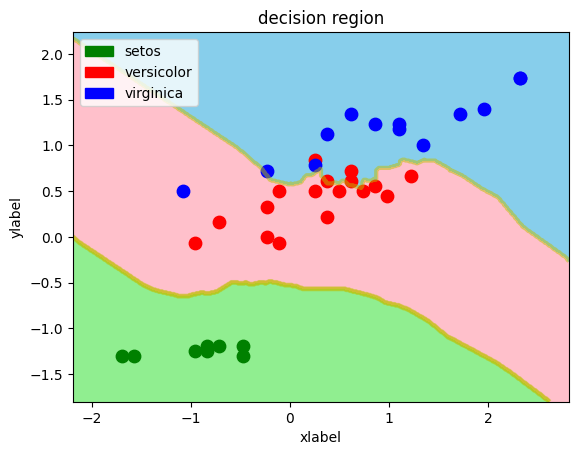

In [50]:
def decision_region3(X, y, model, step=0.01, title='decision region', xlabel='xlabel', ylabel='ylabel', target_names=['versicolor', 'virginica']):
    # setting
    if len(target_names) == 2:
        scatter_color = ['red', 'blue']
        contourf_color = ['pink', 'skyblue']
        n_class = 2
    elif len(target_names) == 3:
        scatter_color = ['green', 'red', 'blue']
        contourf_color = ['lightgreen','pink', 'skyblue']
        n_class = 3

    # pred
    mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1])+0.5, step))
    mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
    y_pred = model.predict(mesh).reshape(mesh_f0.shape)

    # plot
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap=ListedColormap(contourf_color))
    plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors='y', linewidths=3, alpha=0.5)
    for i, target in enumerate(set(y)):
        plt.scatter(X[y==target][:, 0], X[y==target][:,1], s=80, color=scatter_color[i], marker='o')
    patches = [mpatches.Patch(color=scatter_color[i], label=target_names[i]) for i in range(n_class)]
    plt.legend(handles=patches)
    plt.show()

tg_names = ['setos', 'versicolor', 'virginica']
decision_region3(X_test_scaled3, y_test3, neigh5_3, target_names=tg_names)

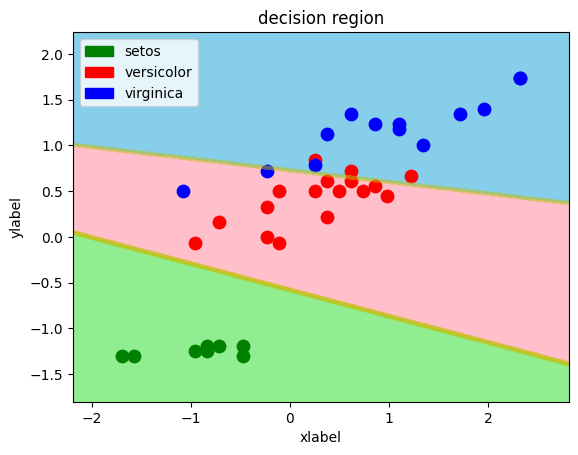

In [51]:
logregression3 = LogisticRegression()
logregression3.fit(X_train_scaled3, y_train3)
log_predict3 = logregression3.predict(X_test_scaled3)

decision_region3(X_test_scaled3, y_test3, logregression3, target_names=tg_names)

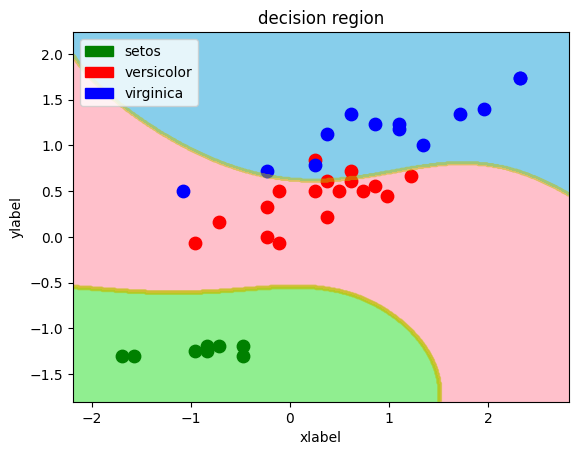

In [52]:
svm3 = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm3.fit(X_train_scaled3, y_train3)
svm_predict3 = svm3.predict(X_test_scaled3)

decision_region3(X_test_scaled3, y_test3, svm3, target_names=tg_names)

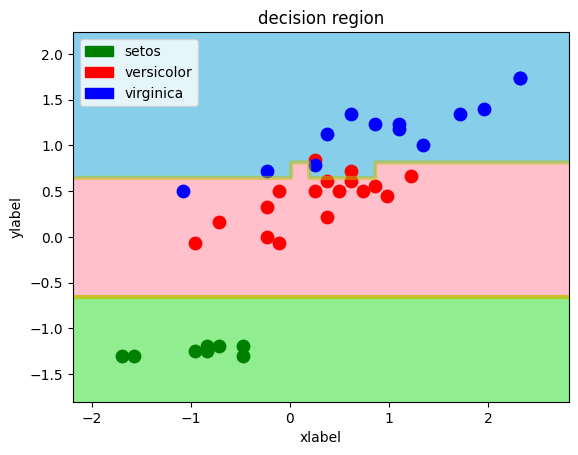

In [53]:
decisiontree3 = DecisionTreeClassifier()
decisiontree3.fit(X_train_scaled3, y_train3)
dtree_predict3 = decisiontree3.predict(X_test_scaled3)

decision_region3(X_test_scaled3, y_test3, decisiontree3, target_names=tg_names)

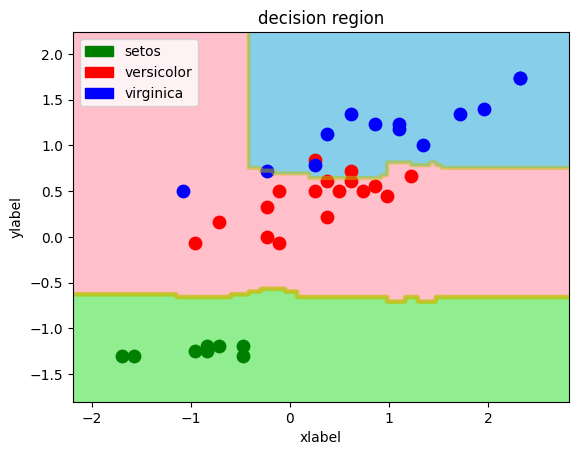

In [54]:
randomforest3 = RandomForestClassifier()
randomforest3.fit(X_train_scaled3, y_train3)
rafo_predict3 = randomforest3.predict(X_test_scaled3)

decision_region3(X_test_scaled3, y_test3, randomforest3, target_names=tg_names)